In-class exercise:

We will create a transboundary river basin map specfying country boundaries and the location of shared reservoirs.  We will generate the Red River basin map similar to Figure 1 in  [Quinn et al. 2018 ](https://agupubs.onlinelibrary.wiley.com/doi/full/10.1029/2018WR022743). 

In [9]:
!pip install basemap
!pip install basemap-data
!pip install basemap-data-hires

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Importing the required libraries

In [ ]:
from mpl_toolkits.basemap import Basemap
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from google.colab import drive


# Reading shapefiles, drawing dams and country boundaries

To find the relevant river basin shapefile, you can use the following  [link](http://riverbasins.wateractionhub.org/).  Scroll down until you find the section 'Find Basin by Country',  from the drop down menu select 'Vietnam' and click 'Submit country'.  You will see 8 different basins, select the HONG(RED RIVER) BASIN, and click 'Download Shapefile'. A zip file containing 5 files will be downloaded, you will need all of them to generate the basin's map. You can then specify the correct path in line 11 below, note that the file is specified without a suffix (e.g. .shp, or .shx), as the readshapefile already expects this format. Carefully inspect and run the code snippet below as you will be required to generate your own map for another case study. 

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


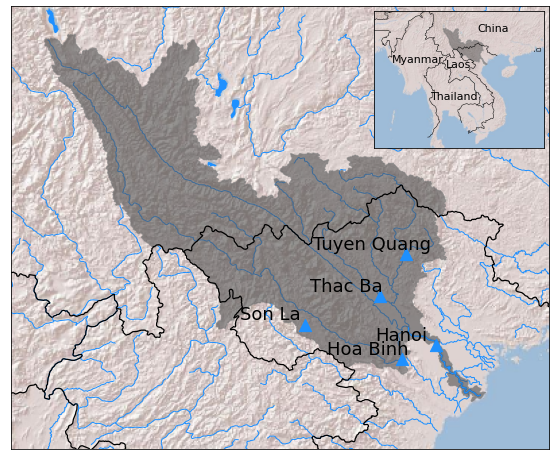

In [8]:
fig = plt.figure()
fig.set_size_inches([17.05,8.15])
ax = fig.add_subplot(111)

# Use the bounding box using the lower and upper latitudes and longitudes of the region
map = Basemap(llcrnrlon=99.6,llcrnrlat=19.5,urcrnrlon=107.5,urcrnrlat=26.0, resolution='h') #indicates the upper and lower latitude and longitude of the river basin
map.arcgisimage(service='World_Shaded_Relief') 
map.fillcontinents(color='None', lake_color='dodgerblue')
map.drawrivers(color='dodgerblue',linewidth=1.0,zorder=1)
map.drawcountries(color='k',linewidth=1.25)
map.readshapefile('/Aqueduct_river_basins_HONG(RED RIVER)', 'Basin', drawbounds=False)
patches = []
for info, shape in zip(map.Basin_info, map.Basin):      
    patches.append(Polygon(np.array(shape), True))
ax.add_collection(PatchCollection(patches, facecolor='0.33', edgecolor='0.5', alpha=0.6))

# plot dams
dams_names=['Hoa Binh', 'Son La', 'Thac Ba', 'Tuyen Quang', 'Hanoi']
dams_longitude = [105.3391,103.9144,105.02305,105.39861,105.8342]
dams_latitude = [20.8275,21.3269,21.747132,22.36000,21.0278]
x, y = map(dams_longitude, dams_latitude)
map.scatter(x, y, c='dodgerblue', s=150, marker='^')
    
# label reservoirs 
for dam in range(len(dams_names)):
  plt.text((dams_longitude[dam] - .5),(dams_latitude[dam] + .15), dams_names[dam], fontsize=18, ha='center',va='center',color='k')
    
# plot inset of greater geographic area
axins = zoomed_inset_axes(ax, 0.1, loc=1)
axins.set_xlim(90, 115)
axins.set_ylim(8,28)
    
plt.xticks(visible=False)
plt.yticks(visible=False)

# add basemap to inset map
#Basemap(llcrnrlon=99.6,llcrnrlat=19.5,urcrnrlon=107.5,urcrnrlat=26.0, resolution='h') 
map2 = Basemap(llcrnrlon=90.0, llcrnrlat=8.0, urcrnrlon=115.0 , urcrnrlat=28.0, resolution='l', ax=axins)
map2.arcgisimage(service='World_Shaded_Relief')
map2.drawcountries(color='k', linewidth=0.5)
axins.add_collection(PatchCollection(patches, facecolor='0.33',edgecolor='0.5',alpha=0.5))
    
# #label countries
country_name=['China','Laos','Thailand','Myanmar']
country_longitude=[107.5, 102.5, 101.9, 96.5]
country_latitude=[25.5, 20.2, 15.5, 21.0]

for country in range(len(country_name)):
  plt.text(country_longitude[country], country_latitude[country], country_name[country],fontsize=11, ha='center',va='center',color='k')

## save the figure in pdf format
#fig.set_size_inches([17.05, 8.15])
#fig.savefig('RiverBasinMap.pdf') # you can save it in any format by changing the suffix, e.g. RiverBasinMap.png, RiverBasinMap.svg
#fig.clf()
